[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raulb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


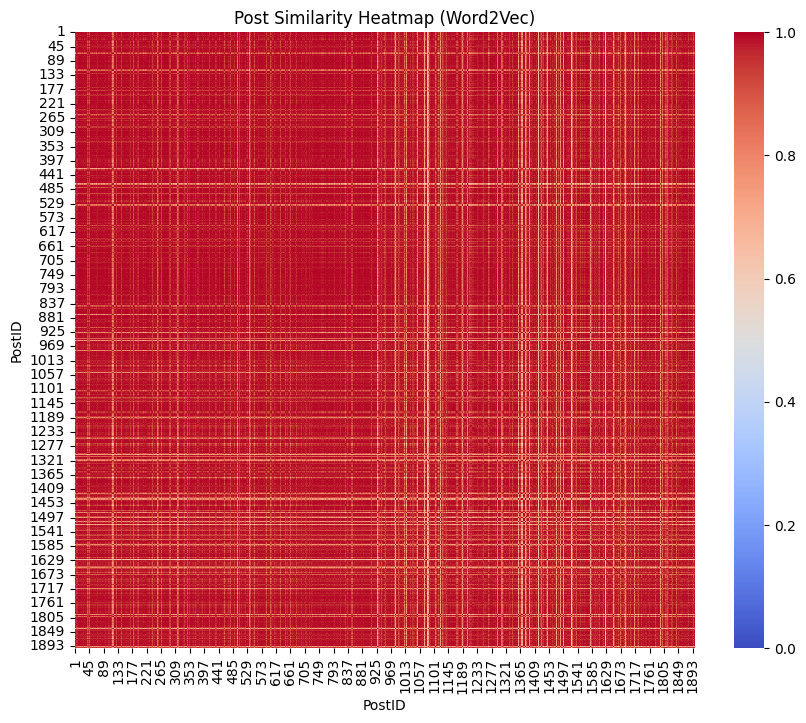

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import nltk

# Ensure necessary resources are available
nltk.download('punkt')

# Load dataset
csv_file_path = "../caption_from_body/posts_caption_from_body.csv"  # Update with your actual file path
df = pd.read_csv(csv_file_path)

# Combine Caption and Body
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")

# Tokenize text
df["tokens"] = df["text"].apply(lambda x: word_tokenize(x.lower()))

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df["tokens"], vector_size=100, window=5, min_count=2, workers=4)

# Function to get average word vector for a post
def get_post_vector(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Get vectors for all posts
post_vectors = np.array([get_post_vector(tokens, word2vec_model) for tokens in df["tokens"]])

# Compute Cosine Similarity
cosine_sim_matrix = cosine_similarity(post_vectors, post_vectors)

# Convert to DataFrame for better visualization
similarity_df = pd.DataFrame(
    cosine_sim_matrix, index=df["PostID"], columns=df["PostID"]
)

# Save similarity matrix for later use
similarity_df.to_csv("../caption_from_body/posts_similarity_matrix_word2vec.csv")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Post Similarity Heatmap (Word2Vec)")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raulb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


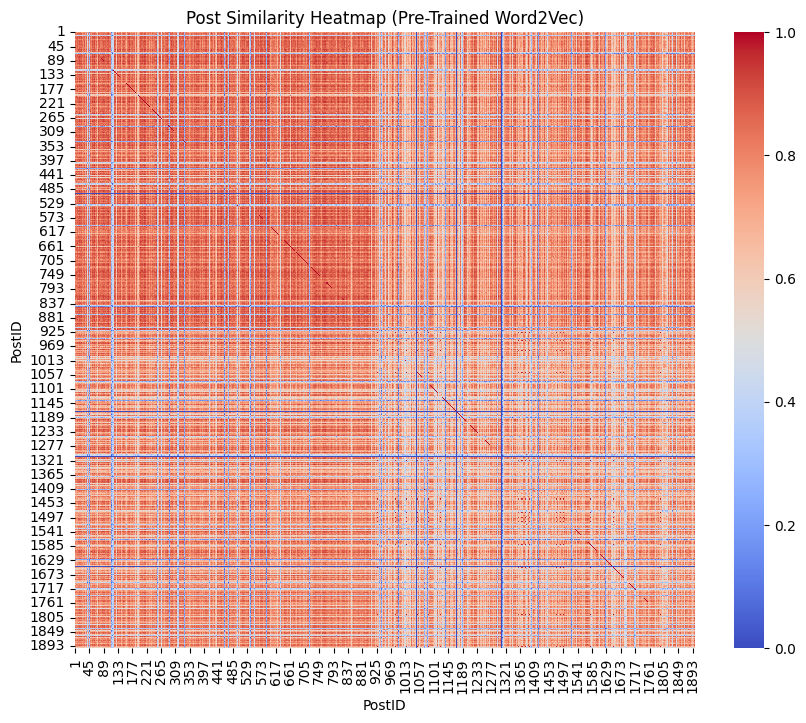

In [2]:
# pre trained

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import nltk

# Ensure necessary resources are available
nltk.download('punkt')

# Load dataset
csv_file_path = "../caption_from_body/posts_caption_from_body.csv"  # Update with your actual file path
df = pd.read_csv(csv_file_path)

# Combine Caption and Body
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")

# Tokenize text
df["tokens"] = df["text"].apply(lambda x: word_tokenize(x.lower()))

# Load Pre-Trained Google Word2Vec Model (~1.5GB, may take time)
word2vec_model = api.load("word2vec-google-news-300")  # Alternative: api.load("fasttext-wiki-news-subwords-300")

# Function to get average word vector for a post
def get_post_vector(tokens, model):
    word_vectors = [model[word] for word in tokens if word in model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Get vectors for all posts
post_vectors = np.array([get_post_vector(tokens, word2vec_model) for tokens in df["tokens"]])

# Compute Cosine Similarity
cosine_sim_matrix = cosine_similarity(post_vectors, post_vectors)

# Convert to DataFrame for better visualization
similarity_df = pd.DataFrame(
    cosine_sim_matrix, index=df["PostID"], columns=df["PostID"]
)

# Save similarity matrix for later use
similarity_df.to_csv("../caption_from_body/posts_similarity_matrix_PT_word2vec.csv")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Post Similarity Heatmap (Pre-Trained Word2Vec)")
plt.show()
